# Iris 데이터 과제

In [164]:
import numpy as np
import pandas as pd

%precision 3
pd.set_option("display.precision", 3)

# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt
import koreanize_matplotlib

# 그래프가 notebook 위에 표시
%matplotlib inline

In [54]:
from scipy import integrate
import warnings

# 적분에 관한 warning을 출력하지 않도록 한다
warnings.filterwarnings('ignore',
                        category=integrate.IntegrationWarning)

# 문제 1 : 데이터셋 불러오기 및 기본 정보 확인

## 1-1) 데이터셋을 불러오고, 데이터프레임으로 변환한 후 첫 5개 행을 출력하시오.

In [13]:
df = pd.read_csv("iris.csv")
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## 1-2) 데이터 프레임의 기본 정보를 확인하고, 각 열의 데이터 타입을 제시하시오.

In [14]:
df["variety"] = df["variety"].astype("category")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal.length  150 non-null    float64 
 1   sepal.width   150 non-null    float64 
 2   petal.length  150 non-null    float64 
 3   petal.width   150 non-null    float64 
 4   variety       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


## 1-3) 붓꽃의 품종에 대한 클래스 분포를 확인하고, 각 클래스별 데이터 개수를 제시하시오.

In [16]:
df.groupby("variety").count()

,sepal.length,sepal.width,petal.length,petal.width
variety,,,,
Setosa,50,50,50,50
Versicolor,50,50,50,50
Virginica,50,50,50,50


# 문제 2 : 데이터 시각화 및 탐색

## 2-1) 붓꽃 데이터셋에서 각 특성 간의 산점도(scatter plot)을 그리되, 각 클래스별로 다른 색상을 사용하여 시각화하시오.

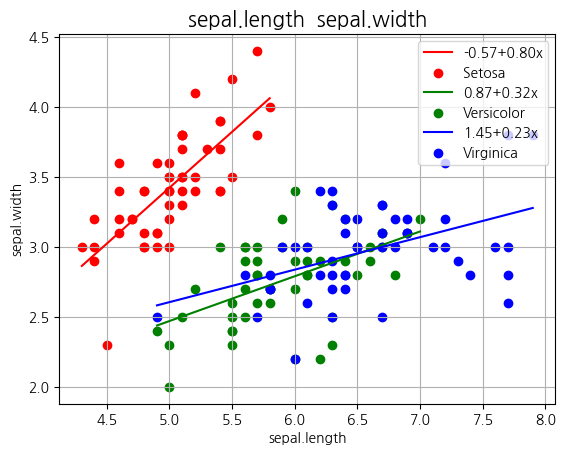

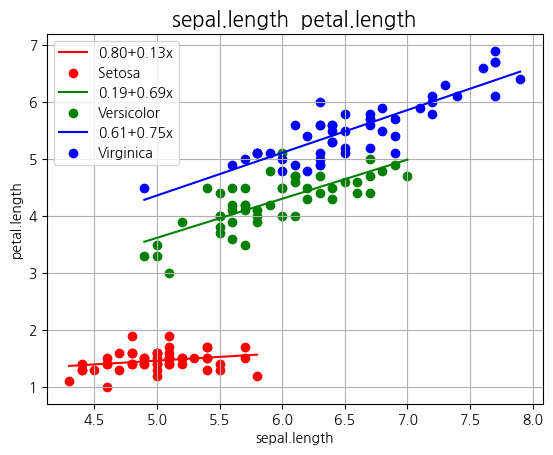

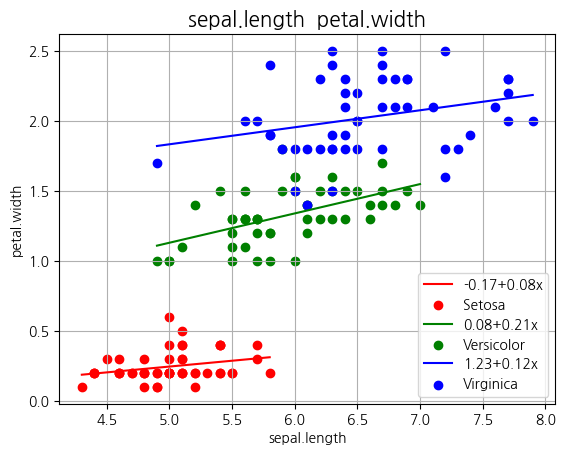

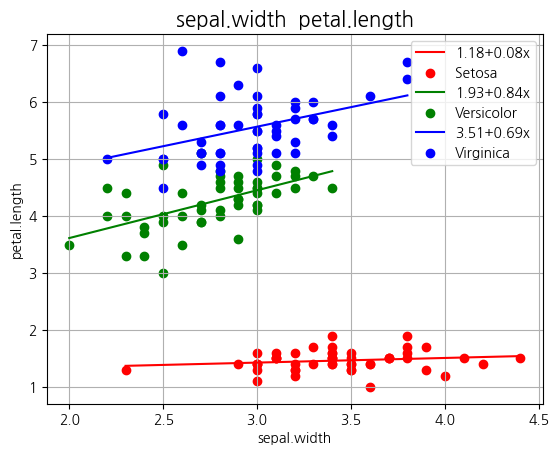

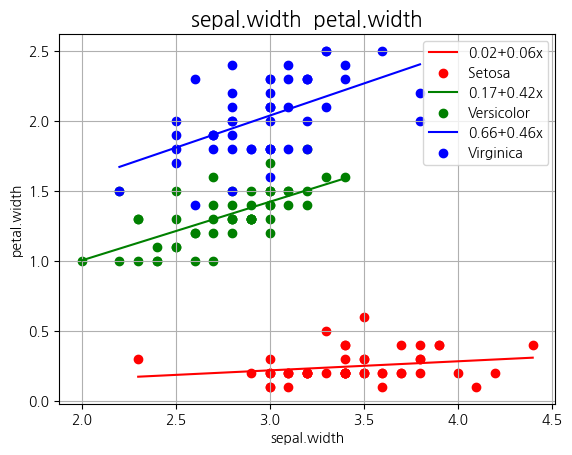

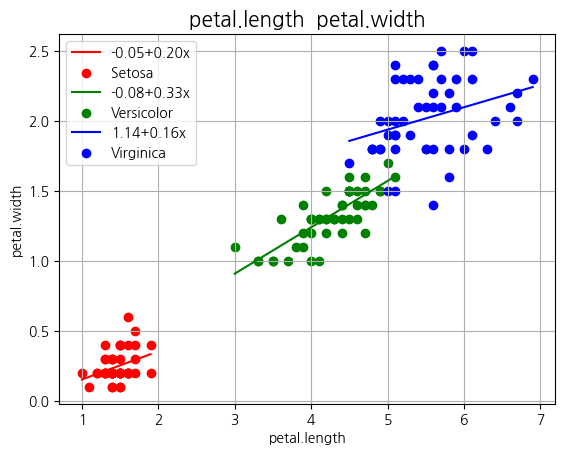

In [30]:
color = ["red", "green", "blue"]
i = 0

col_list = df.columns[:-1]

col_idx = 1
for col1 in col_list[:-1]:
    for col2 in col_list[col_idx:]:
    
        # 품종 => ['Setosa', 'Versicolor', 'Virginica']
        for kind in df["variety"].unique():
            kind_df = df[df["variety"] == kind] # 각 종으로만 이루어진 df 생성
        
            # 직선 그래프
            poly_fit = np.polyfit(kind_df[col1], kind_df[col2], 1) # 계수 구하기
            poly_1d = np.poly1d(poly_fit)
            xs = np.linspace(kind_df[col1].min(), kind_df[col1].max())
            ys = poly_1d(xs)
            plt.plot(xs, ys, color=color[i], label=f"{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x")
        
            # scatter 그래프
            plt.scatter(kind_df[col1], kind_df[col2], color=color[i], label=kind)
            
            # X축에 레이블 부여
            plt.xlabel(col1)
            # Y축에 레이블 부여
            plt.ylabel(col2)
            
            i += 1
        plt.grid()
        plt.title(f"{col1}  {col2}", fontsize = 15)
        plt.legend()
        plt.show()

        i = 0
    col_idx += 1
    

## 2-2) 꽃받침의 길이(Sepal Length)와 꽃받침의 너비(Sepal Width)의 관계를 시각화하고, 각 클래스별로 구분하여 출력하시오.

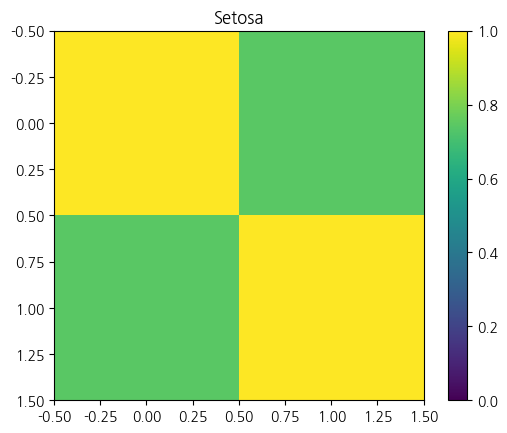

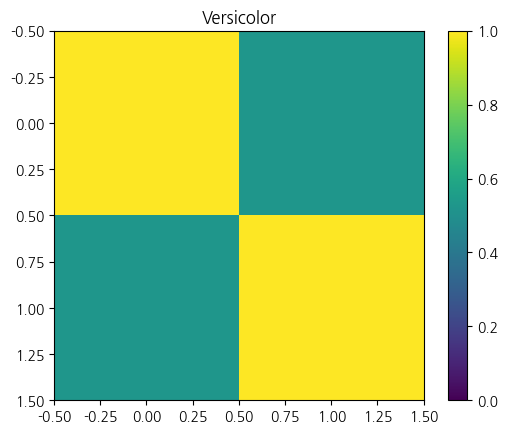

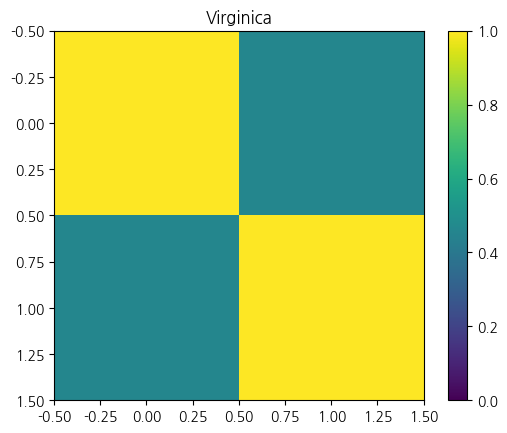

In [53]:
color = ["red", "green", "blue"]
i = 0
# 품종 => ['Setosa', 'Versicolor', 'Virginica']
for kind in df["variety"].unique():
    kind_df = df[df["variety"] == kind].loc[:,("sepal.length", "sepal.width")] # 각 종으로만 이루어진 df 생성
    plt.imshow(kind_df.corr())

    plt.title(kind)
    plt.colorbar()
    plt.clim(0, 1) # color bar 범위 설정 
    plt.show()
    


# 문제 3 : 연속확률변수 및 연속확률분포 계산

## 3-1) 꽃잎의 길이(Petal Length)를 연속확률변수로 가정할 때, 이 확률변수의 평균과 분산을 계산하시오.

In [66]:
x_range = np.array(df["petal.length"])
x_range

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [136]:
# 확률밀도함수 -> 균일 분포
def f(x):
    if x_range.min() <= x <= x_range.max():
        return 1 / (x_range.max()-x_range.min())
    else:
        return 0

### 평균

In [137]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

3.95

In [119]:
# x_range.mean() # 왜 다르노...ㅠ

3.76

In [129]:
integrate.quad(f, -np.inf, np.inf)[0] # 1은 맞는데엥.....

1.00

### 분산

In [141]:
mean = 3.95
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

2.90

In [131]:
np.var(x_range)

3.10

## 3-2) 꽃잎의 너비(Petal Width)를 연속확률변수로 가정할 때, 이 확률변수의 확률밀도함수를 계산하고 그래프로 시각화하시오.

In [142]:
x_range = np.array(df["petal.width"])
x_range

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5,
       1.5, 1.3, 1.5, 1.3, 1.6, 1. , 1.3, 1.4, 1. , 1.5, 1. , 1.4, 1.3,
       1.4, 1.5, 1. , 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7,
       1.5, 1. , 1.1, 1. , 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2,
       1.4, 1.2, 1. , 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8,
       2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2. , 1.9, 2.1, 2. , 2.4, 2.3, 1.8,
       2.2, 2.3, 1.5, 2.3, 2. , 2. , 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6,
       1.9, 2. , 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9,
       2.3, 2.5, 2.3, 1.9, 2. , 2.3, 1.8])

In [143]:
# 확률밀도함수 -> 균일 분포
def f(x):
    if x_range.min() <= x <= x_range.max():
        return 1 / (x_range.max()-x_range.min())
    else:
        return 0

### 평균

In [144]:
def integrand(x):
    return x * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

1.30

In [145]:
x_range.mean()

1.20

### 분산

In [147]:
mean = 1.30
def integrand(x):
    return (x - mean) ** 2 * f(x)

integrate.quad(integrand, -np.inf, np.inf)[0]

0.48

In [148]:
np.var(x_range)

0.58

## 3-3) 꽃잎의 길이(Petal Length) 가 4cm 이상 5cm 미만일 확률을 계산하시오.

In [195]:
x_range = np.array(df["petal.length"])
x_range

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5,
       4.9, 4. , 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4. , 4.7, 3.6,
       4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4. , 4.9, 4.7, 4.3, 4.4, 4.8, 5. ,
       4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4. , 4.4,
       4.6, 4. , 3.3, 4.2, 4.2, 4.2, 4.3, 3. , 4.1, 6. , 5.1, 5.9, 5.6,
       5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5. , 5.1, 5.3, 5.5,
       6.7, 6.9, 5. , 5.7, 4.9, 6.7, 4.9, 5.7, 6. , 4.8, 4.9, 5.6, 5.8,
       6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1,
       5.9, 5.7, 5.2, 5. , 5.2, 5.4, 5.1])

In [196]:
# 확률밀도함수 -> 균일 분포
def f(x):
    if x_range.min() <= x <= x_range.max():
        return 1 / (x_range.max()-x_range.min())
    else:
        return 0

In [197]:
integrate.quad(f, 4, 5)[0]

0.169

In [201]:
cnt = 0
for i in x_range:
    if 4<=i<5:
        cnt += 1
cnt / len(x_range)

0.287

In [200]:
print(list(df['petal.length'].sort_values()))

[1.0, 1.1, 1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.7, 1.7, 1.7, 1.7, 1.9, 1.9, 3.0, 3.3, 3.3, 3.5, 3.5, 3.6, 3.7, 3.8, 3.9, 3.9, 3.9, 4.0, 4.0, 4.0, 4.0, 4.0, 4.1, 4.1, 4.1, 4.2, 4.2, 4.2, 4.2, 4.3, 4.3, 4.4, 4.4, 4.4, 4.4, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.5, 4.6, 4.6, 4.6, 4.7, 4.7, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.3, 5.3, 5.4, 5.4, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.9, 5.9, 6.0, 6.0, 6.1, 6.1, 6.1, 6.3, 6.4, 6.6, 6.7, 6.7, 6.9]
